<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/3_r1_vs_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.3 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/Files/3_ri_vs_random

3_10_round10_vs_random.zip  3_4_round4_vs_random.zip  3_8_round8_vs_random.zip
3_1_round1_vs_random.zip    3_5_round5_vs_random.zip  3_9_round9_vs_random.zip
3_2_round2_vs_random.zip    3_6_round6_vs_random.zip
3_3_round3_vs_random.zip    3_7_round7_vs_random.zip


In [ ]:
%cd /content/gdrive/MyDrive/Files/3_ri_vs_random

/content/gdrive/MyDrive/Files/3_ri_vs_random


In [ ]:
!ls

3_10_round10_vs_random.zip  3_4_round4_vs_random.zip  3_8_round8_vs_random.zip
3_1_round1_vs_random.zip    3_5_round5_vs_random.zip  3_9_round9_vs_random.zip
3_2_round2_vs_random.zip    3_6_round6_vs_random.zip
3_3_round3_vs_random.zip    3_7_round7_vs_random.zip


In [ ]:
!unzip '/content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random.zip' -d '/content/gdrive/MyDrive/Files/3_ri_vs_random'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/0_2.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_6.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_11.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_21.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_26.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_29.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_30.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/1_32.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/0_39.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random/0_42.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_

In [ ]:
path = Path('/content/gdrive/MyDrive/Files/3_ri_vs_random/3_1_round1_vs_random')

In [ ]:
files = get_image_files(path)
#files[0]

In [ ]:
len(files)

12000

In [ ]:
pat = r'^(.*)_\d+.png'

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


SuggestedLRs(slide=0.009120108559727669, valley=0.00010964782268274575)

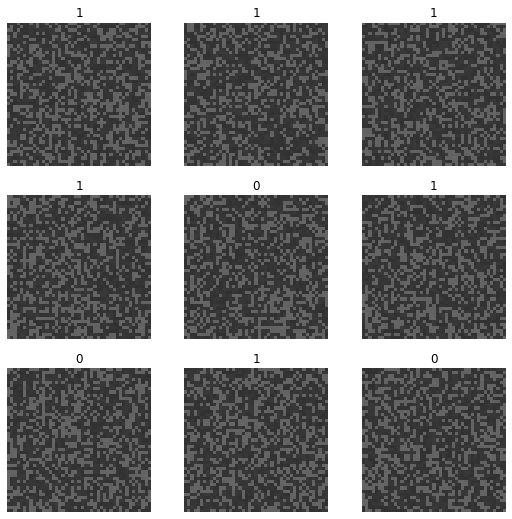

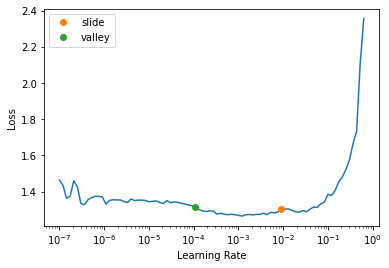

In [ ]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()
learn1 = vision_learner(dls1, 'convnext_nano', metrics=accuracy)
learn1.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn1.fine_tune(10, 4.6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.920090,0.835986,0.502500,00:34


epoch,train_loss,valid_loss,accuracy,time
0,0.740272,0.707723,0.501667,00:37
1,0.724310,0.747585,0.477917,00:36
2,0.730920,0.806755,0.495417,00:36
3,0.734378,0.799691,0.519583,00:39
4,0.719379,0.733484,0.515000,00:36
5,0.710612,0.718370,0.495417,00:36
6,0.680557,0.735302,0.492500,00:36
7,0.645653,0.825659,0.485000,00:37
8,0.602831,0.825383,0.496250,00:38
9,0.590366,0.827837,0.492917,00:46


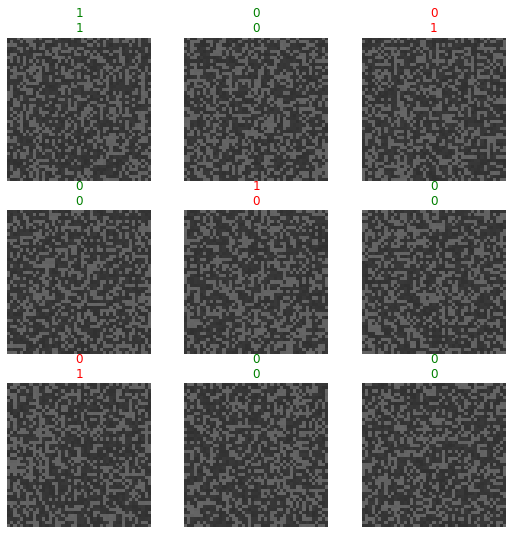

In [ ]:
learn1.show_results()

Since the accuracy is around 50%, 
the model is not distinguishing ciphertexts generated from round-1 and random texts

SuggestedLRs(slide=0.00363078061491251, valley=5.248074739938602e-05)

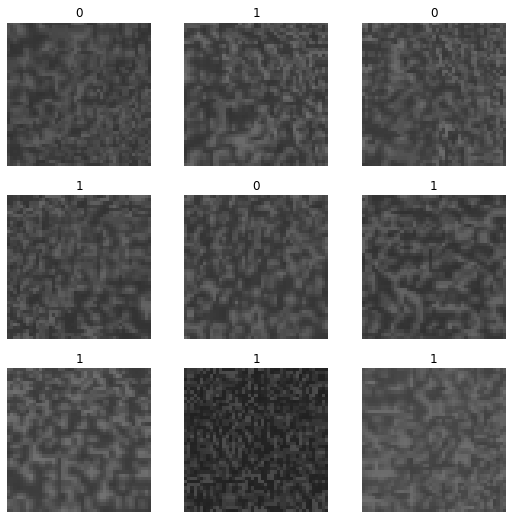

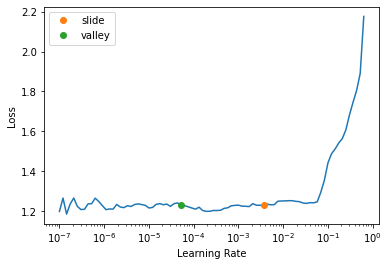

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()
learn2 = vision_learner(dls2, 'convnext_nano', metrics=accuracy)
learn2.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn2.fine_tune(10, 1.8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.998366,0.790895,0.505833,00:35


epoch,train_loss,valid_loss,accuracy,time
0,0.822752,0.706941,0.499583,00:39
1,0.786407,0.924583,0.508750,00:38
2,0.744551,0.714377,0.511667,00:37
3,0.721767,0.694407,0.509167,00:36
4,0.711061,0.692822,0.510000,00:38
5,0.709840,0.708512,0.512083,00:42
6,0.704482,0.705655,0.488333,00:40
7,0.701212,0.698175,0.489167,00:37
8,0.697473,0.693237,0.503333,00:37
9,0.698504,0.694354,0.488750,00:36


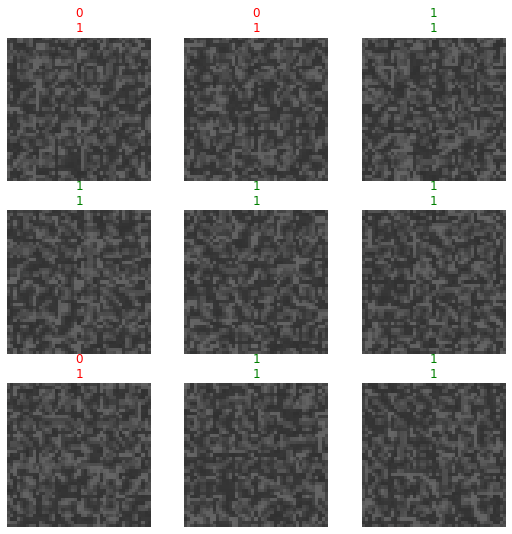

In [ ]:
learn2.show_results()

Since the accuracy is around 50%, 
the model is not distinguishing ciphertexts generated from round-1 and random texts

#DarkNet

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


SuggestedLRs(slide=0.0030199517495930195, valley=0.0004786300996784121)

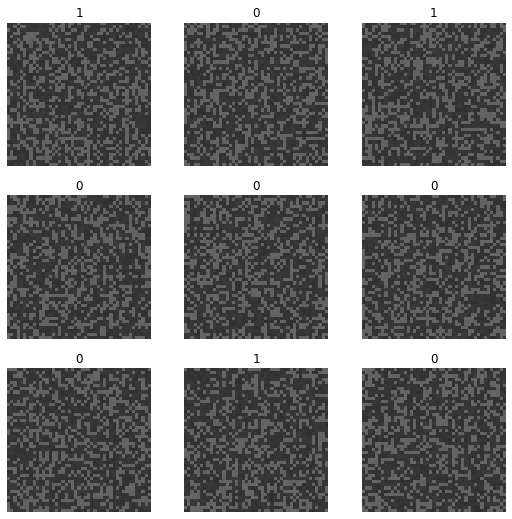

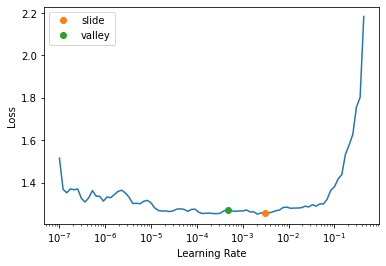

In [ ]:
dls3 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls3.show_batch()
learn3 = vision_learner(dls3, 'darknet53', metrics=accuracy)
learn3.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn3.fine_tune(10, 1.7e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.098300,0.882191,0.496667,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.839242,0.725893,0.487500,00:37
1,0.779736,0.743311,0.490417,00:38
2,0.742431,0.763621,0.487500,00:38
3,0.722652,0.723873,0.500833,00:40
4,0.701980,0.729418,0.485000,00:40
5,0.693106,0.733917,0.483750,00:44
6,0.660793,0.755259,0.495833,00:37
7,0.633635,0.771189,0.499583,00:37
8,0.610367,0.779907,0.497500,00:38
9,0.599174,0.775919,0.508750,00:38


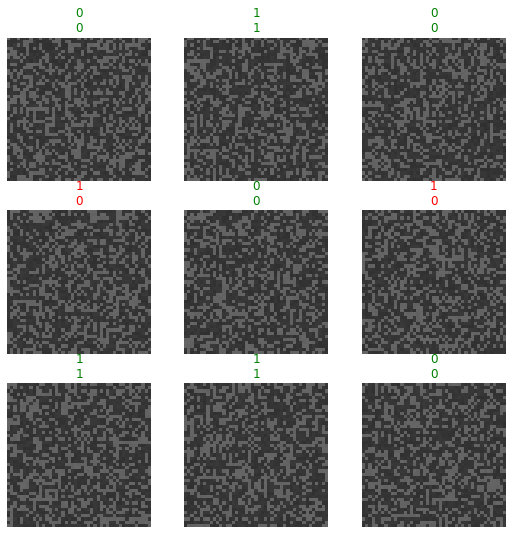

In [ ]:
learn3.show_results()

In [ ]:
# learn3.recorder.plot_metrics()

SuggestedLRs(slide=0.004365158267319202, valley=0.004365158267319202)

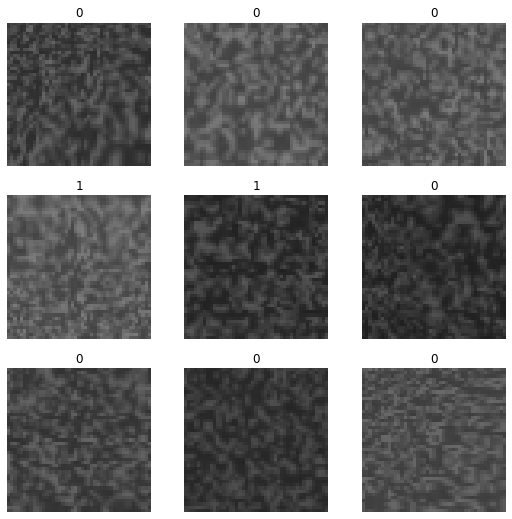

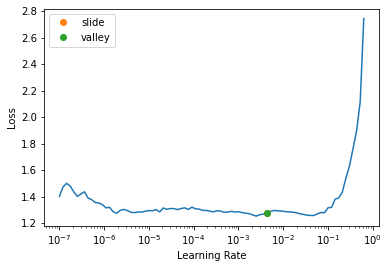

In [ ]:
dls4 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls4.show_batch()
learn4 = vision_learner(dls4, 'darknet53', metrics=accuracy, cbs=[Recorder])
learn4.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn4.fine_tune(10,4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.978966,0.817358,0.488750,00:35
0,0.978966,0.817358,0.488750,00:35


epoch,train_loss,valid_loss,accuracy,time
0,0.745128,0.756177,0.498750,00:38
0,0.745128,0.756177,0.498750,00:38
1,0.718669,0.753016,0.499167,00:41
1,0.718669,0.753016,0.499167,00:41
2,0.739551,0.812717,0.489583,00:39
2,0.739551,0.812717,0.489583,00:39
3,0.743017,0.895886,0.495000,00:38
3,0.743017,0.895886,0.495000,00:38
4,0.732321,0.906083,0.500833,00:37
4,0.732321,0.906083,0.500833,00:37


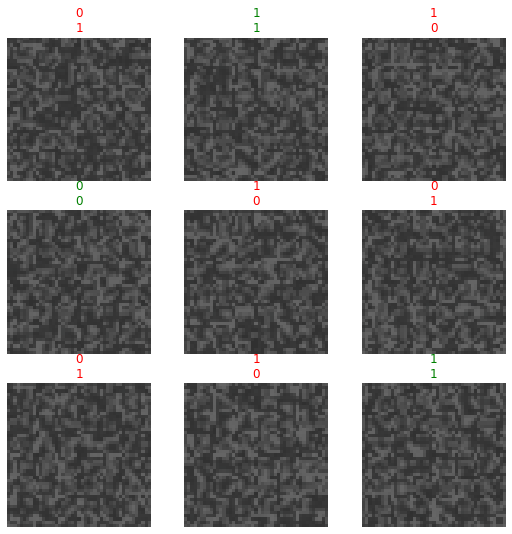

In [ ]:
learn4.show_results()

#ResNet34

epoch,train_loss,valid_loss,accuracy,time
0,1.058201,0.855200,0.489167,00:35


epoch,train_loss,valid_loss,accuracy,time
0,0.839778,0.742847,0.510000,00:47
1,0.774603,0.728074,0.503750,00:36
2,0.718722,0.717866,0.498333,00:36
3,0.703085,0.713846,0.496250,00:36
4,0.679980,0.724562,0.500000,00:37
5,0.645884,0.761021,0.513750,00:36
6,0.609425,0.782944,0.505833,00:39
7,0.571739,0.812897,0.507083,00:43
8,0.550256,0.833087,0.506250,00:41
9,0.526179,0.833207,0.497083,00:36


Few Results on Test set: 


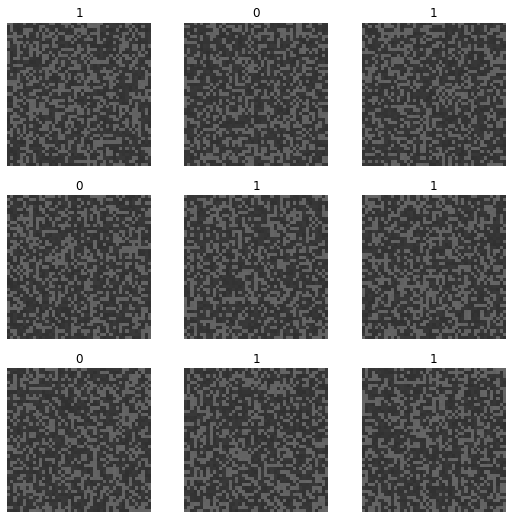

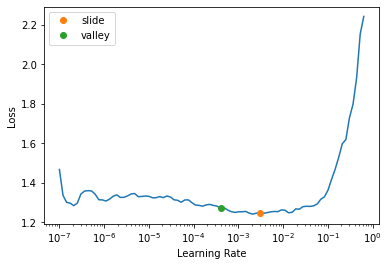

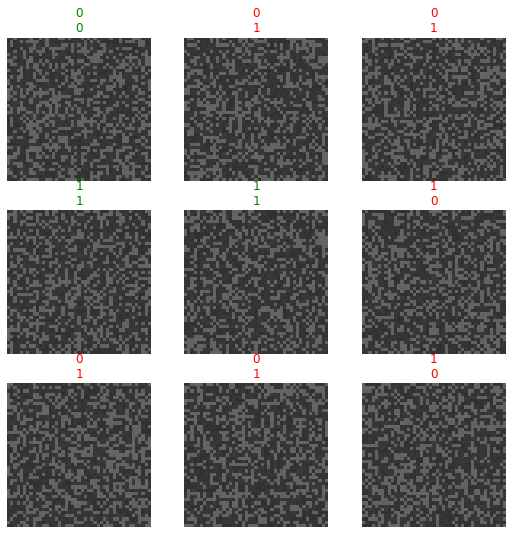

In [ ]:
dls5 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls5.show_batch()
learn5 = vision_learner(dls5, 'resnet34', metrics=accuracy)
x = learn5.lr_find(suggest_funcs=(slide, valley))
learn5.fine_tune(10,(x[0]+x[1])/2.0)
print("Few Results on Test set: ")
learn5.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.090630,0.816882,0.490833,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.847106,0.736170,0.485417,00:35
1,0.772918,0.711666,0.506667,00:38
2,0.727541,0.703924,0.508750,00:41
3,0.716911,0.702071,0.510000,00:47
4,0.710593,0.700991,0.482500,00:37
5,0.707208,0.698562,0.501250,00:35
6,0.705269,0.694991,0.498333,00:37
7,0.701747,0.694778,0.504583,00:37
8,0.698180,0.693854,0.503750,00:34
9,0.696866,0.693752,0.503750,00:38


Few Results on Test set: 


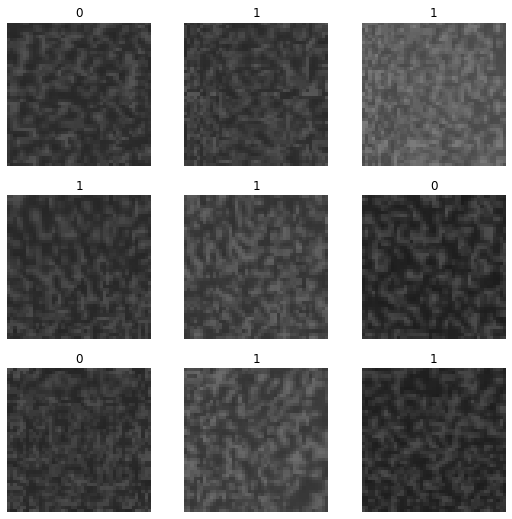

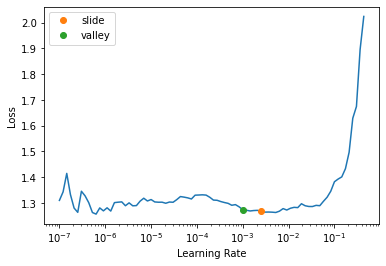

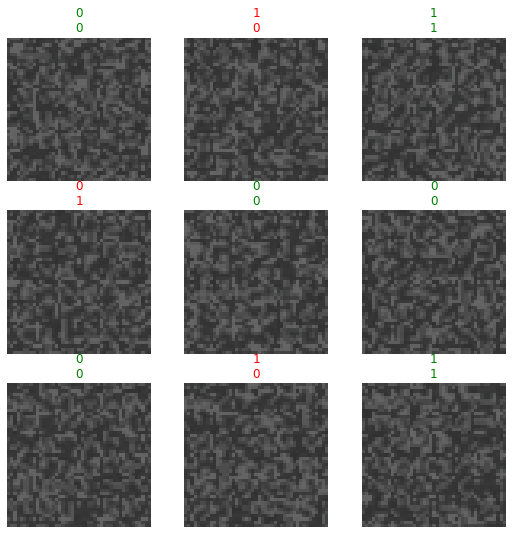

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls.show_batch()
learn = vision_learner(dls, 'resnet34', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

#densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.103132,0.867060,0.505417,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.785099,0.746742,0.503750,00:46
1,0.731341,0.730417,0.490000,00:46
2,0.711066,0.723990,0.512500,00:49
3,0.700646,0.715201,0.513750,00:46
4,0.696519,0.767385,0.505000,00:45
5,0.681985,0.740541,0.496250,00:45
6,0.664821,0.737310,0.497917,00:45
7,0.651933,0.744186,0.508333,00:49
8,0.646922,0.738166,0.501250,00:45
9,0.631590,0.746164,0.498750,00:46


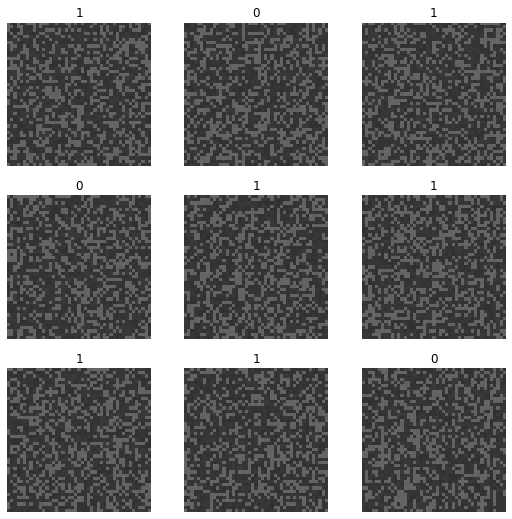

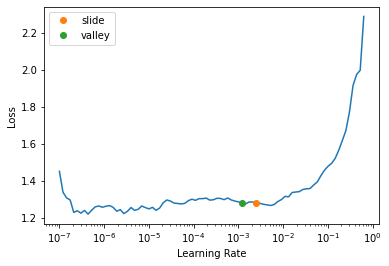

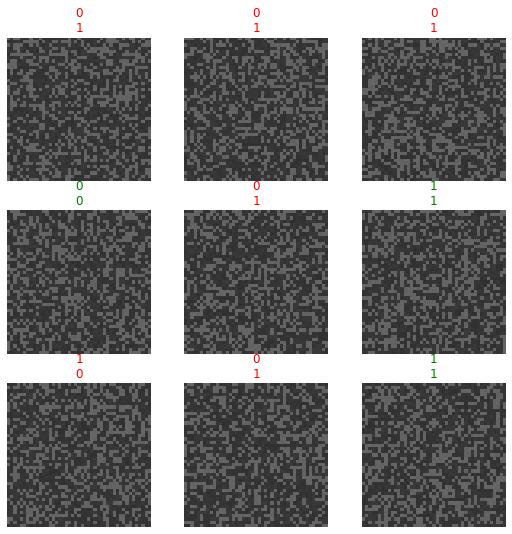

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls.show_batch()
learn = vision_learner(dls, 'densenet121', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.974183,3.618604,0.511667,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.738727,2.029860,0.510000,00:50
1,0.719987,0.955528,0.508333,00:46
2,0.723966,0.698836,0.487083,00:46
3,0.730288,0.964689,0.510833,00:46
4,0.718117,0.790580,0.489167,00:49
5,0.716943,1.170148,0.487083,00:46
6,0.712125,0.702626,0.510833,00:46
7,0.701795,0.717938,0.510417,00:46
8,0.701046,0.698725,0.495417,00:46
9,0.698293,0.703277,0.489167,00:50


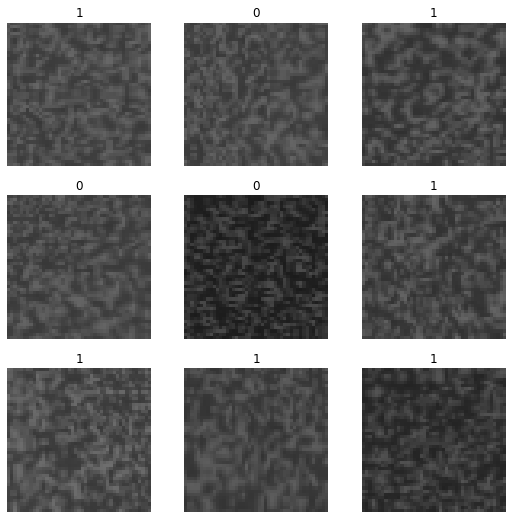

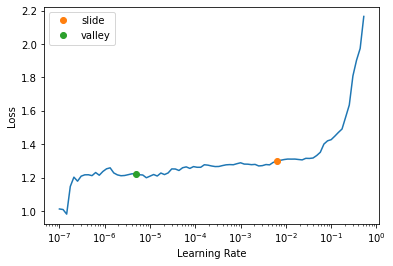

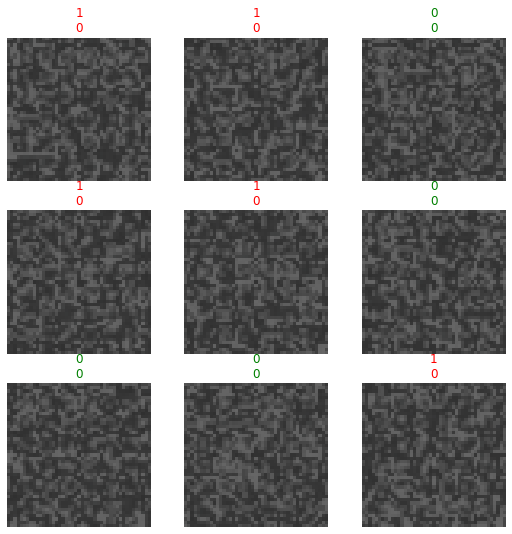

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls.show_batch()
learn = vision_learner(dls, 'densenet121', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.080639,1.954510,0.512500,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.788184,0.979760,0.517500,00:53
1,0.737178,1.104241,0.524583,00:49
2,0.714448,0.792120,0.497500,00:50
3,0.715975,0.829716,0.489583,00:49
4,0.712360,0.769638,0.499167,00:53
5,0.706470,0.717213,0.488750,00:49
6,0.702923,0.805097,0.513750,00:49
7,0.694756,0.738429,0.491250,00:49
8,0.693697,0.735192,0.504167,00:49
9,0.690482,0.793171,0.509583,00:52


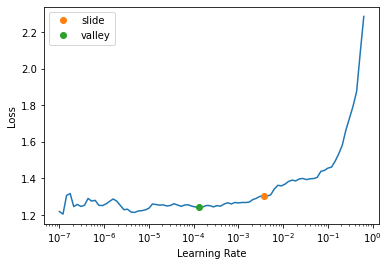

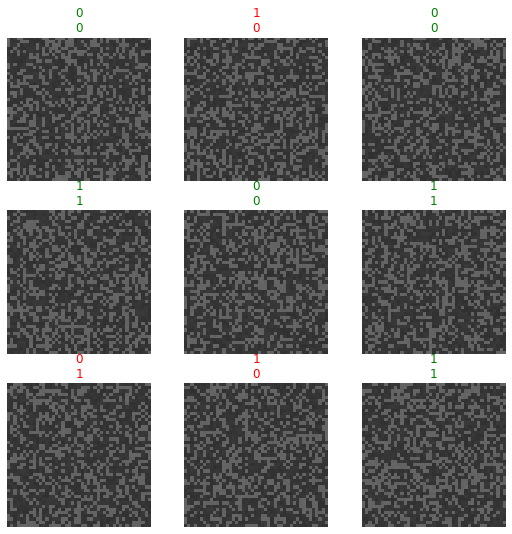

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
# dls.show_batch()
learn = vision_learner(dls, 'resnet152', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.958435,0.867423,0.480000,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.734019,0.720276,0.480833,00:49
1,0.729488,0.710743,0.511667,00:53
2,0.735523,0.720498,0.487917,00:49
3,0.732725,0.709266,0.505833,00:49
4,0.728240,0.722163,0.491250,00:49
5,0.721581,0.726728,0.475417,00:53
6,0.709574,0.697573,0.512083,00:49
7,0.703033,0.695977,0.508333,00:49
8,0.702973,0.697468,0.489167,00:49
9,0.698866,0.693967,0.518333,00:53


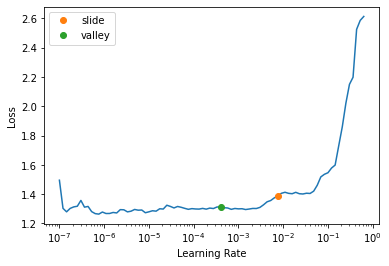

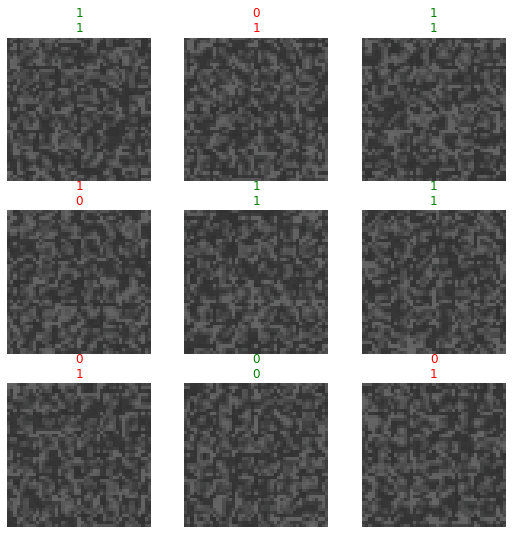

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
# dls.show_batch()
learn = vision_learner(dls, 'resnet152', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

#pnasnet5large

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/pnasnet5large-bf079911.pth" to /root/.cache/torch/hub/checkpoints/pnasnet5large-bf079911.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.957430,0.930819,0.493333,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.814670,0.856449,0.504583,01:07
1,0.828742,0.790180,0.496667,01:07
2,0.794601,0.791464,0.492083,01:10
3,0.754657,0.842454,0.497500,01:07
4,0.731507,0.825287,0.499583,01:07
5,0.718705,0.820870,0.497500,01:09
6,0.713937,0.819440,0.505417,01:07
7,0.701270,0.864360,0.496667,01:07
8,0.696024,0.781199,0.499167,01:10
9,0.677642,0.833073,0.504167,01:07


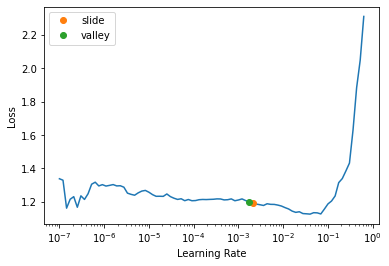

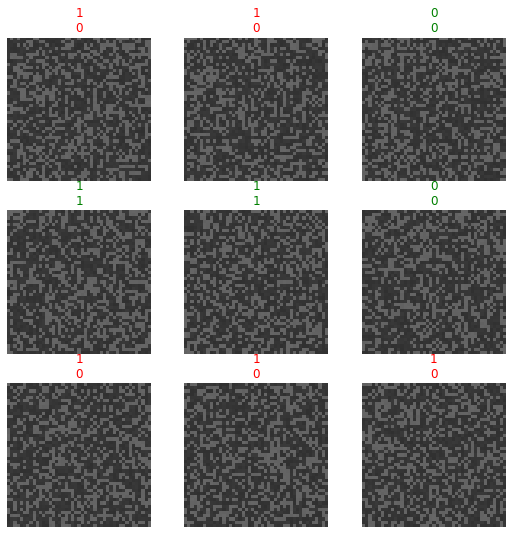

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
# dls.show_batch()
learn = vision_learner(dls, 'pnasnet5large', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.978221,1.084014,0.505000,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.838669,0.818609,0.486250,01:13
1,0.809983,0.986831,0.510000,01:10
2,0.793140,0.794904,0.507500,01:10
3,0.762594,0.720030,0.510833,01:12
4,0.740560,0.759081,0.515417,01:10
5,0.734086,0.724288,0.502083,01:13
6,0.723868,0.703993,0.500417,01:10
7,0.710217,0.713973,0.505833,01:09
8,0.708242,0.705773,0.496667,01:12
9,0.706290,0.697486,0.496667,01:10


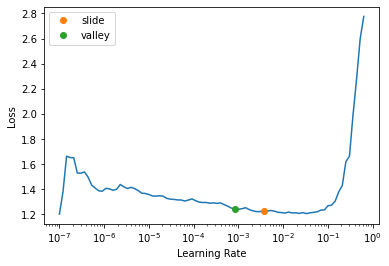

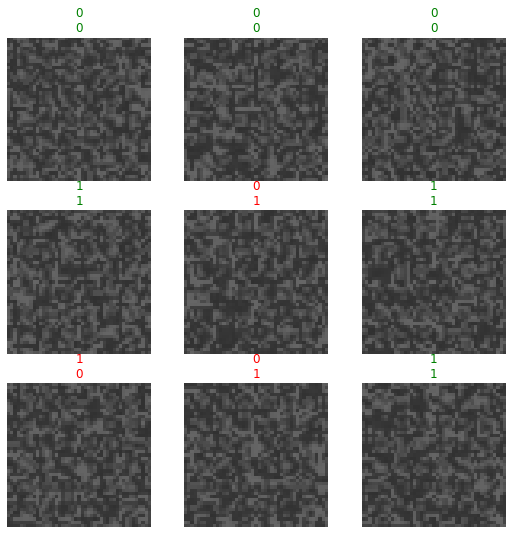

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
# dls.show_batch()
learn = vision_learner(dls, 'pnasnet5large', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.064473,0.775329,0.501667,00:47


epoch,train_loss,valid_loss,accuracy,time
0,0.738288,0.720936,0.497500,00:49
1,0.717712,0.716341,0.506667,00:49
2,0.720199,0.726779,0.503333,00:49
3,0.718692,0.725741,0.484583,00:53
4,0.708636,0.717264,0.485417,00:48
5,0.697628,0.725982,0.495000,00:49
6,0.689984,0.723217,0.490000,00:48
7,0.669139,0.726520,0.500833,00:52
8,0.659672,0.728671,0.504583,00:48
9,0.655426,0.724824,0.500417,00:48


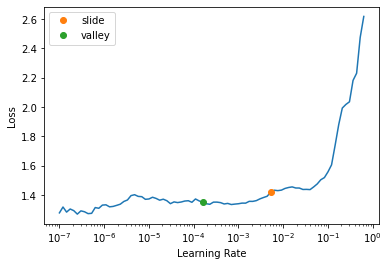

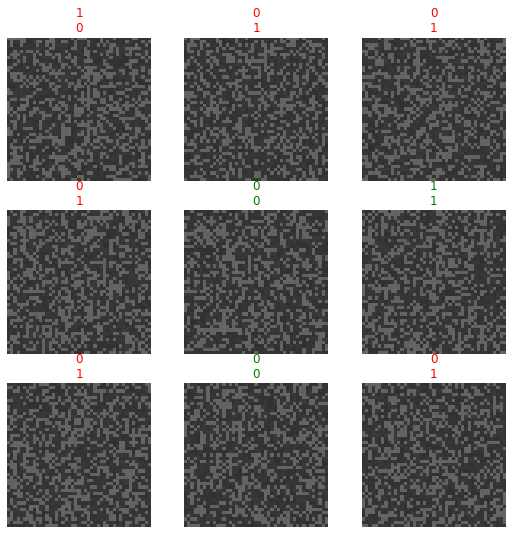

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
# dls.show_batch()
learn = vision_learner(dls, 'resnext101_64x4d', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.184979,0.922823,0.501667,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.845731,0.754866,0.509583,00:49
1,0.768271,0.731853,0.492083,00:50
2,0.723494,0.715720,0.493750,00:49
3,0.711298,0.708734,0.505417,00:53
4,0.712300,0.707853,0.471667,00:49
5,0.709475,0.699357,0.503750,00:50
6,0.702812,0.698082,0.492083,00:49
7,0.697887,0.697977,0.492917,00:53
8,0.697882,0.696152,0.506667,00:49
9,0.695242,0.696267,0.494167,00:49


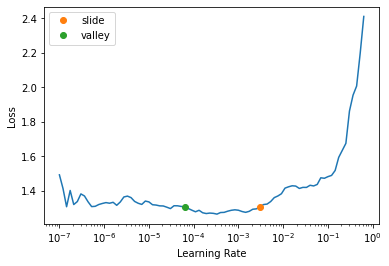

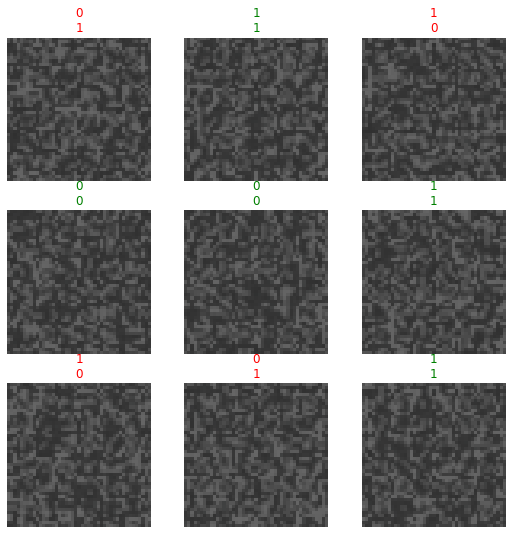

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
# dls.show_batch()
learn = vision_learner(dls, 'resnext101_64x4d', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
learn.show_results()